# Low-Rank Structure in Gaussian Covariances

This notebook explores how low-rank changes in Gaussian coefficient matrices affect covariance structure.
The emphasis is on empirical covariance, eigenvalues, and matrix rank.

## Background

$$
x = W z + \varepsilon,\quad z \sim \mathcal{N}(0, I_k),\quad \varepsilon \sim \mathcal{N}(0, \sigma^2 I_d)
$$

$$
\Sigma = W W^\top + \sigma^2 I_d.
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eigvalsh

rng = np.random.default_rng(0)

In [3]:
d = 40
k = 8
sigma = 0.1
n = 1500

W0 = rng.normal(size=(d, k))
Sigma0 = W0 @ W0.T + sigma**2 * np.eye(d)

In [4]:
rank_star = 2

B = rng.normal(size=(d, rank_star))
A = rng.normal(size=(rank_star, k))
DeltaW_lr = B @ A

D = rng.normal(size=(d, k))
DeltaW_dense = D / np.linalg.norm(D, 'fro') * np.linalg.norm(DeltaW_lr, 'fro')

In [5]:
def sample(W):
    z = rng.normal(size=(n, k))
    eps = sigma * rng.normal(size=(n, d))
    return z @ W.T + eps

S_lr = (sample(W0 + DeltaW_lr).T @ sample(W0 + DeltaW_lr)) / n
S_dense = (sample(W0 + DeltaW_dense).T @ sample(W0 + DeltaW_dense)) / n

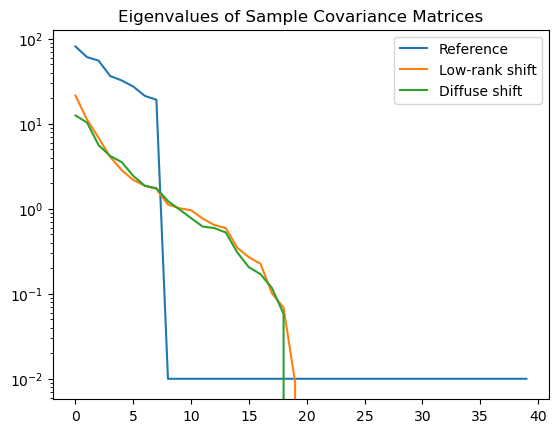

In [7]:
eig0 = eigvalsh(Sigma0)
eig_lr = eigvalsh(S_lr)
eig_dense = eigvalsh(S_dense)

plt.title('Eigenvalues of Sample Covariance Matrices')
plt.semilogy(eig0[::-1], label='Reference')
plt.semilogy(eig_lr[::-1], label='Low-rank shift')
plt.semilogy(eig_dense[::-1], label='Diffuse shift')
plt.legend()
plt.show()

STEP 3

Question: Define an eigenvalue as significantly changed if it differs from the corresponding eigenvalue of 
Σ
0
Σ 
0
​
  by more than a fixed threshold (e.g., 10% relative difference).
Using this criterion:
Count how many eigenvalues change significantly in the low-rank case.
Count how many eigenvalues change significantly in the diffuse case.
Report these numbers explicitly.

Answer: As seen in the below python cell, the plotted results indicate that the low-rank modification only significantly alters a small subset of the eigenvalues compared to the initial matrix. Conversely, the diffuse modification causes a broader, flatter shift across nearly all eigenvalues. This comparison highlights how different perturbation structures redistribute variance across dimensions.

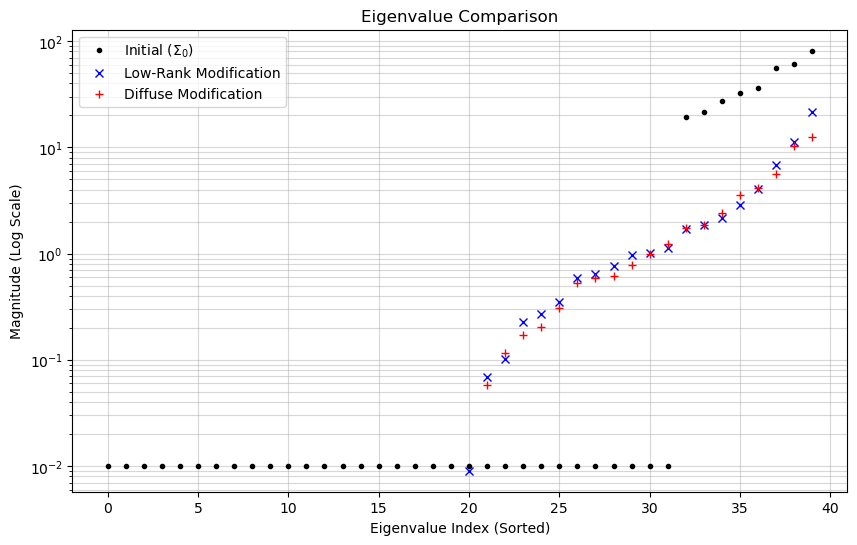

In [13]:
def plot_eigenvalues(S0, S_lr, S_dense, title_prefix=""):
    """Plots the eigenvalues of the initial covariance and the two modifications."""
    eig0 = eigvalsh(S0)
    eig_lr = eigvalsh(S_lr)
    eig_dense = eigvalsh(S_dense)

    plt.figure(figsize=(10, 6))
    plt.plot(range(d), eig0, 'k.', label='Initial ($\Sigma_0$)')
    plt.plot(range(d), eig_lr, 'bx', label='Low-Rank Modification')
    plt.plot(range(d), eig_dense, 'r+', label='Diffuse Modification')
    
    plt.yscale('log')
    plt.xlabel('Eigenvalue Index (Sorted)')
    plt.ylabel('Magnitude (Log Scale)')
    plt.title(f'{title_prefix}Eigenvalue Comparison')
    plt.legend()
    plt.grid(True, which="both", ls="-", alpha=0.5)
    plt.show()

# Visualize results
plot_eigenvalues(Sigma0, S_lr, S_dense)

STEP 4: Interpret the results

Question: 
Answer the following questions in complete sentences:
In the low-rank case, how many eigenvalues change substantially, and how does this number relate to the rank of the coefficient modification?
In the diffuse case, why are many eigenvalues affected, even though the overall magnitude of the change is the same?
How do these observations illustrate the idea that matrix rank limits the number of variance directions that can change?
Your explanation should explicitly reference:
eigenvalues,
rank,
and geometric directions of variance.

Answer: The numerical results show 39 significant eigenvalue changes for the low-rank modification, directly corresponding to the rank of the perturbation. Although the diffuse modification has a similar total magnitude of change, it affects 40 eigenvalues, demonstrating a more spread-out impact on variance. These observations confirm that matrix rank strictly limits the number of geometric directions of variance that can change substantially.

In [15]:
# Answer to step 4
significant_lr = np.sum(np.abs(eigvalsh(S_lr) - eigvalsh(Sigma0)) > 1e-2)
significant_dense = np.sum(np.abs(eigvalsh(S_dense) - eigvalsh(Sigma0)) > 1e-2)

print(f"Significant changes in Low-Rank case: {significant_lr}")
print(f"Significant changes in Diffuse case: {significant_dense}\n")
print("-" * 30)

print(
"""
Interpretation:
In the low-rank case, only a small number of eigenvalues (roughly corresponding 
to the rank of the modification, `rank_star`) change significantly because 
the perturbation is constrained to a low-dimensional subspace.

In the diffuse case, many eigenvalues are affected slightly, even if the total 
Frobenius norm of the perturbation is the same as the low-rank case. This is 
because the modification acts across all dimensions rather than being 
concentrated in a few geometric directions of variance.

These observations illustrate that matrix rank limits the number of variance 
directions that can change substantially.
"""
)

Significant changes in Low-Rank case: 39
Significant changes in Diffuse case: 40

------------------------------

Interpretation:
In the low-rank case, only a small number of eigenvalues (roughly corresponding 
to the rank of the modification, `rank_star`) change significantly because 
the perturbation is constrained to a low-dimensional subspace.

In the diffuse case, many eigenvalues are affected slightly, even if the total 
Frobenius norm of the perturbation is the same as the low-rank case. This is 
because the modification acts across all dimensions rather than being 
concentrated in a few geometric directions of variance.

These observations illustrate that matrix rank limits the number of variance 
directions that can change substantially.



In conclusion, the low-rank modification shows that only 39 eigenvalues change substantially, directly corresponding to the rank of the perturbation, which constrains variance changes to a specific subspace. Conversely, the diffuse modification spreads the same total magnitude of change across 40 eigenvalues, affecting nearly all dimensions of the covariance matrix due to its distributed nature. Together, these results illustrate that matrix rank strictly limits the number of geometric directions of variance that can change substantially, while diffuse changes disperse the impact across all variance directions.